In [80]:

import numpy as np
import pandas as pd 
from sklearn.preprocessing import minmax_scale
from sklearn.multioutput import RegressorChain
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt




In [81]:
def mean_euclidean_error(y_true, y_pred):
    """
    mean euclidean error MEE
    """

    error = 0
    if len(y_true) == len(y_pred):
        for i in range(len(y_true)):
            error = error + np.sqrt(np.square(y_pred[i][0]
                                    - y_true[i][0])
                                    + np.square(y_pred[i][1]
                                    - y_true[i][1]))
        return error / len(y_true)

In [23]:
train_df = pd.read_csv('../data/ML-CUP20-TR .csv')
test_df = pd.read_csv('../data/ML-CUP20-TS.csv')

# Spilitting the targets and input features
train_x = train_df.iloc[:,:-2].to_numpy()
train_y = train_df.iloc[:,[10,11]].to_numpy()


In [82]:
"""split train dataset"""

(x_train, x_test, y_train, y_test) = train_test_split(train_x, train_y,
        test_size=0.4, random_state=30)

In [83]:
"""regression models """

knn_model = Pipeline(steps=[('scale', StandardScaler(with_mean=True,
                     with_std=True)), ('estimator',
                     RegressorChain(KNeighborsRegressor(n_neighbors=4),
                     order=[0, 1]))])
et_regressor = Pipeline(steps=[('scale', StandardScaler()), ('estimator'
                        ,
                        RegressorChain(ExtraTreeRegressor(random_state=0),
                        order=[0, 1]))])
dt_regressor = Pipeline(steps=[('scale', StandardScaler(with_mean=True,
                        with_std=True)), ('estimator',
                        RegressorChain(DecisionTreeRegressor(random_state=0),
                        order=[0, 1]))])
direct_svr = Pipeline(steps=[('scale', StandardScaler(with_mean=True,
                      with_std=True)), ('estimator',
                      MultiOutputRegressor(SVR(kernel='rbf', C=0.1,
                      gamma='scale', epsilon=0.1)))])
chin_svr = Pipeline(steps=[('scale', StandardScaler(with_mean=True,
                    with_std=True)), ('estimator',
                    RegressorChain(SVR(kernel='rbf', C=0.1,
                    gamma='scale', epsilon=0.1)))])


In [84]:
"""parametres of models for gridsearch """

knn_params = {
    'estimator__base_estimator__n_neighbors': [
        5,
        6,
        7,
        8,
        9,
        10,
        ],
    'estimator__base_estimator__leaf_size': [1, 2, 3, 5],
    'estimator__base_estimator__weights': ['uniform', 'distance'],
    'estimator__base_estimator__algorithm': ['auto', 'ball_tree',
            'kd_tree', 'brute'],
    }

er_params = {
    'estimator__base_estimator__criterion': ['mse', 'mae', 'poisson',
            'friedman_mse'],
    'estimator__base_estimator__min_samples_split': [10, 20, 40, 'best'
            ],
    'estimator__base_estimator__max_depth': [2, 6, 8],
    'estimator__base_estimator__min_samples_leaf': [20, 40, 100],
    'estimator__base_estimator__max_leaf_nodes': [5, 20, 100],
    }

dt_params = {
    'estimator__base_estimator__criterion': ['mse', 'mae', 'poisson',
            'friedman_mse'],
    'estimator__base_estimator__min_samples_split': [10, 20, 40, 'best'
            ],
    'estimator__base_estimator__max_depth': [2, 6, 8],
    'estimator__base_estimator__min_samples_leaf': [20, 40, 100],
    'estimator__base_estimator__max_leaf_nodes': [5, 20, 100],
    }

dsvr_params = {
    'estimator__estimator__kernel': ['rbf'],
    'estimator__estimator__C': np.logspace(-3, 2, 6).tolist(),
    'estimator__estimator__gamma': [0.0001, 0.001, 0.01, 0.1],
    'estimator__estimator__epsilon': np.logspace(-3, 2, 6).tolist(),
    }
chinesvr_params = {
    'estimator__base_estimator__kernel': ['rbf'],
    'estimator__base_estimator__gamma': [0.0001, 0.001, 0.01, 0.1],
    'estimator__base_estimator__C': np.logspace(-3, 2, 6, 8).tolist(),
    'estimator__base_estimator__epsilon': np.logspace(-3, 2, 6,
            8).tolist(),
    }


In [85]:
""" list of regression_models, parameters_list and models name  """

regression_models = [knn_model, et_regressor, dt_regressor, direct_svr,
                     chin_svr]
parameters_list = [knn_params, er_params, dt_params, dsvr_params,
                   chinesvr_params]
model_log = ['KNeighborsRegressor', 'ExtraTreeRegressor',
             'DecisionTreeRegressor', 'MultiOutputRegressor',
             'RegressorChain']

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1876 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:    5.5s finished


Best parameters:{'estimator__base_estimator__algorithm': 'auto', 'estimator__base_estimator__leaf_size': 1, 'estimator__base_estimator__n_neighbors': 9, 'estimator__base_estimator__weights': 'distance'}
Best training accuracy:-8.331988657486633
Test dataset accuracy score for best params:0.9478572026236229
Mean_euclidean_error for test dataset :2.7731330780360004
Best model :Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 RegressorChain(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                                   leaf_size=1,
                                                                   metric='minkowski',
                                                                   metric_params=None,
                                                                   n_jobs=None,
                                                 

/home/anelay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Unrecognized location 'Best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


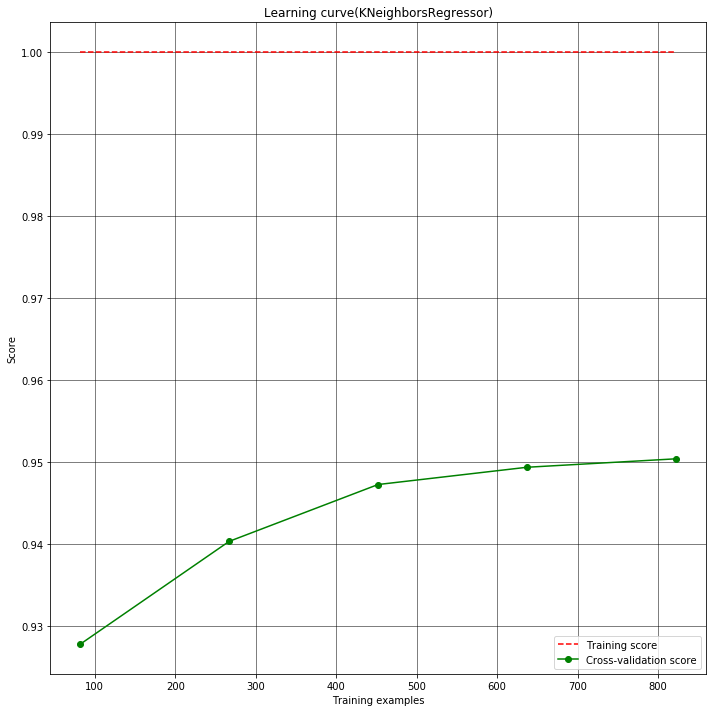

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1008 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 3568 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:    8.6s finished


Best parameters:{'estimator__base_estimator__criterion': 'mse', 'estimator__base_estimator__max_depth': 6, 'estimator__base_estimator__max_leaf_nodes': 20, 'estimator__base_estimator__min_samples_leaf': 20, 'estimator__base_estimator__min_samples_split': 10}
Best training accuracy:-23.96242084478743
Test dataset accuracy score for best params:0.8354099104142045
Mean_euclidean_error for test dataset :5.204552789907836
Best model :Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 RegressorChain(base_estimator=ExtraTreeRegressor(ccp_alpha=0.0,
                                                                  criterion='mse',
                                                                  max_depth=6,
                                                                  max_features='auto',
                                                                  max_leaf_nodes=20

/home/anelay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Unrecognized location 'Best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


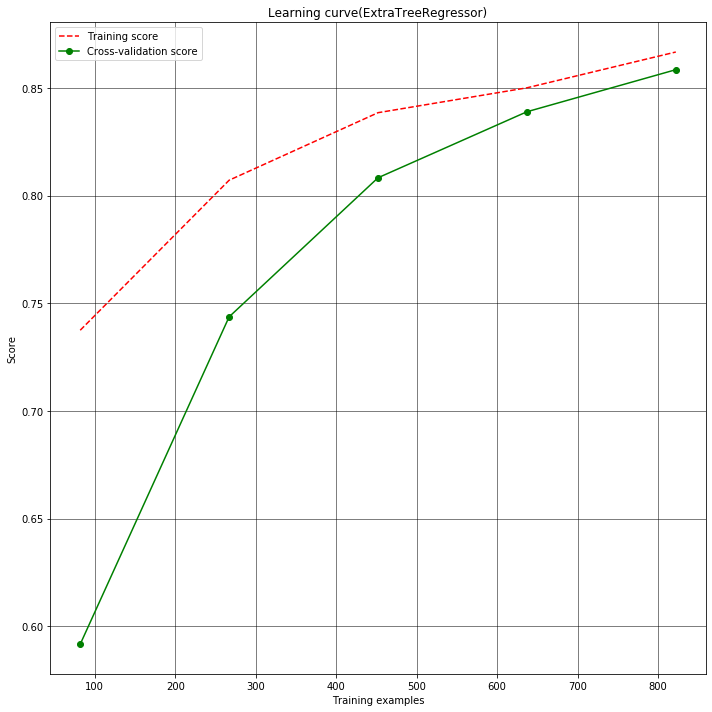

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1520 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 2064 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   20.2s finished


Best parameters:{'estimator__base_estimator__criterion': 'mse', 'estimator__base_estimator__max_depth': 8, 'estimator__base_estimator__max_leaf_nodes': 100, 'estimator__base_estimator__min_samples_leaf': 20, 'estimator__base_estimator__min_samples_split': 10}
Best training accuracy:-23.185516021686578
Test dataset accuracy score for best params:0.8858595854280789
Mean_euclidean_error for test dataset :4.0625360105727655
Best model :Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 RegressorChain(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                     criterion='mse',
                                                                     max_depth=8,
                                                                     max_features=None,
                                                                     m

/home/anelay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Unrecognized location 'Best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


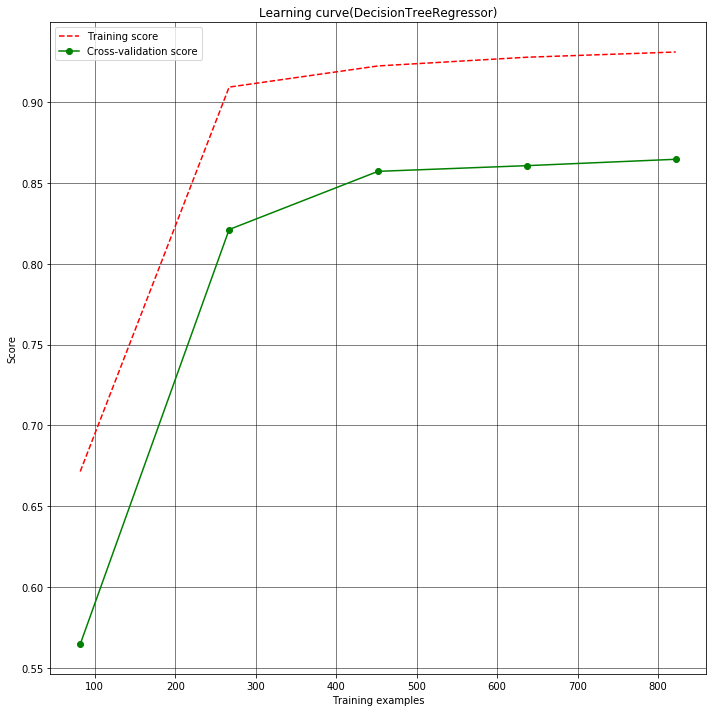

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 1250 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 1425 out of 1440 | elapsed:   18.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:   19.6s finished


Best parameters:{'estimator__estimator__C': 10.0, 'estimator__estimator__epsilon': 1.0, 'estimator__estimator__gamma': 0.1, 'estimator__estimator__kernel': 'rbf'}
Best training accuracy:-8.060080745057805
Test dataset accuracy score for best params:0.946903270781067
Mean_euclidean_error for test dataset :2.941934013610687
Best model :Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 MultiOutputRegressor(estimator=SVR(C=10.0, cache_size=200,
                                                    coef0=0.0, degree=3,
                                                    epsilon=1.0, gamma=0.1,
                                                    kernel='rbf', max_iter=-1,
                                                    shrinking=True, tol=0.001,
                                                    verbose=False),
                                      n_jobs=None))],
     

/home/anelay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Unrecognized location 'Best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


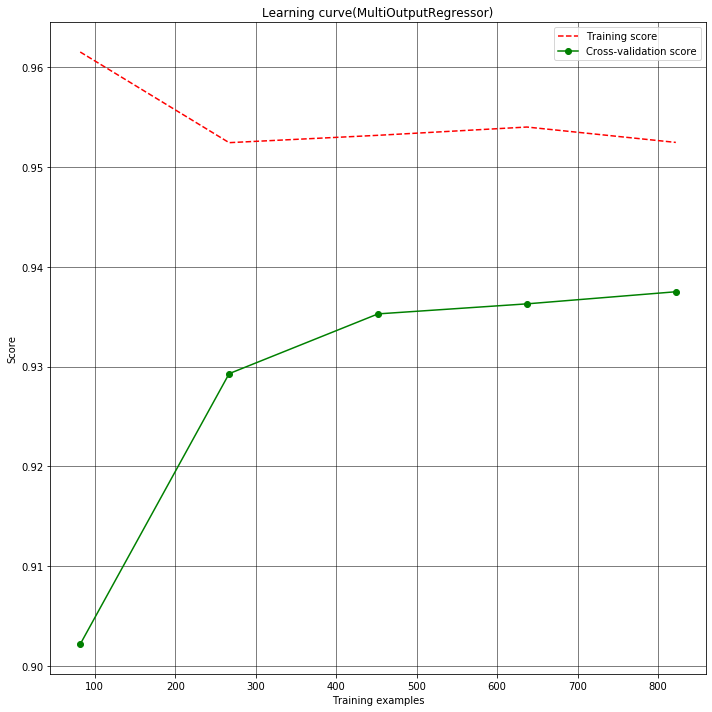

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 816 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 1425 out of 1440 | elapsed:   23.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:   24.7s finished


Best parameters:{'estimator__base_estimator__C': 10.0, 'estimator__base_estimator__epsilon': 0.1, 'estimator__base_estimator__gamma': 0.1, 'estimator__base_estimator__kernel': 'rbf'}
Best training accuracy:-9.442567685204676
Test dataset accuracy score for best params:0.9399071852286248
Mean_euclidean_error for test dataset :2.9750682622972846
Best model :Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 RegressorChain(base_estimator=SVR(C=10.0, cache_size=200,
                                                   coef0=0.0, degree=3,
                                                   epsilon=0.1, gamma=0.1,
                                                   kernel='rbf', max_iter=-1,
                                                   shrinking=True, tol=0.001,
                                                   verbose=False),
                                cv=None, or

/home/anelay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Unrecognized location 'Best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


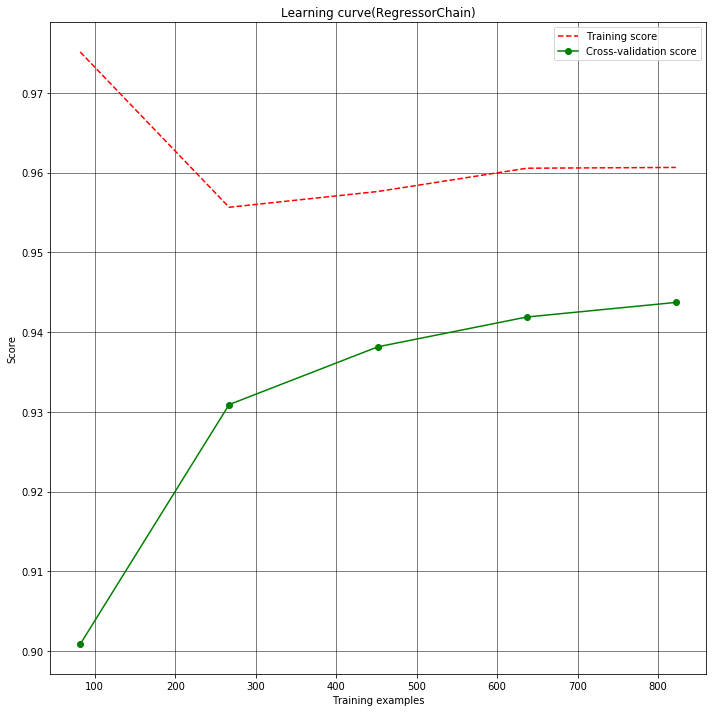

In [86]:

""" Gridsearch and Learning curve"""

for i in range(len(regression_models)):
    Grid = GridSearchCV(
        estimator=regression_models[i],
        param_grid=parameters_list[i],
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        cv=10,
        verbose=3,
        ).fit(x_train, y_train)
    y_pred = Grid.predict(x_test)
    df_result = pd.DataFrame(Grid.cv_results_)
    (train_sizes, train_scores, test_scores) = \
        learning_curve(Grid.best_estimator_, x_train, y_train, cv=10,
                       n_jobs=5)

    print(f"Best parameters:{Grid.best_params_}")
    print(f"Best training accuracy:{Grid.best_score_}")
    print(f"Test dataset accuracy score for best params:{r2_score(y_test, y_pred)}" )
    print(f"Mean_euclidean_error for test dataset :{mean_euclidean_error(y_test, y_pred)}" )
    print(f"Best model :{Grid.best_estimator_}")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    (fig, ax) = plt.subplots(1, figsize=(10, 10))
    ax.grid(linestyle='-', linewidth='0.5', color='black')
    ax.set_axisbelow(True)
    plt.plot(train_sizes, train_scores_mean, '--', color='r',
             label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
             label='Cross-validation score')
    plt.title(f"Learning curve({model_log[i]})")
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend(loc='Best')
    plt.tight_layout()
    plt.show()


In [78]:
RegressorChain(SVR()).get_params()
MultiOutputRegressor(SVR()).get_params()

{'base_estimator__C': 1.0,
 'base_estimator__cache_size': 200,
 'base_estimator__coef0': 0.0,
 'base_estimator__degree': 3,
 'base_estimator__epsilon': 0.1,
 'base_estimator__gamma': 'scale',
 'base_estimator__kernel': 'rbf',
 'base_estimator__max_iter': -1,
 'base_estimator__shrinking': True,
 'base_estimator__tol': 0.001,
 'base_estimator__verbose': False,
 'base_estimator': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
     kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
 'cv': None,
 'order': None,
 'random_state': None}